# Spaceship Titanic
To predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

#### Filter warnings

In [1]:
%matplotlib inline
# Suppress all warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import lightgbm as lgb
import xgboost as xgb

## Dataset

### Loading

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Verifying Dataset

#### Training Data `head()`

In [4]:
print("Training Data (First 5 rows):")
print(train_df.head())

Training Data (First 5 rows):
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3     

#### Training Data `tail()`

In [5]:
print("Training Data (Last 5 rows):")
print(train_df.tail())

Training Data (Last 5 rows):
     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Tra

#### Test Data `head()`

In [6]:
print("Test Data (First 5 rows):")
print(test_df.head())

Test Data (First 5 rows):
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  


#### Test Data `tail()`

In [7]:
print("Test Data (Last 5 rows):")
print(test_df.tail())

Test Data (Last 5 rows):
     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name  
4272          0.0        0.0           0.0   0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0  10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0   0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0   0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0   0.0     0.0  Lilace Leonzaley  


## Data Exploration

### Basic Information

In [8]:
print("Data Types and Missing Values:")
print(train_df.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


### Summary Statistics for Numerical Columns

In [9]:
print("\nSummary Statistics for Numerical Columns:")
print(train_df.describe())


Summary Statistics for Numerical Columns:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


### Missing Values Check

In [10]:
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


### Data Visualization
Exploring relationships between features.

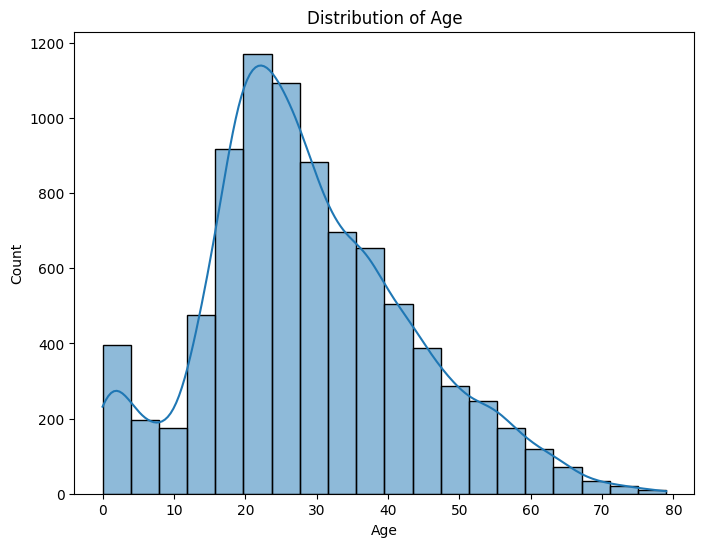

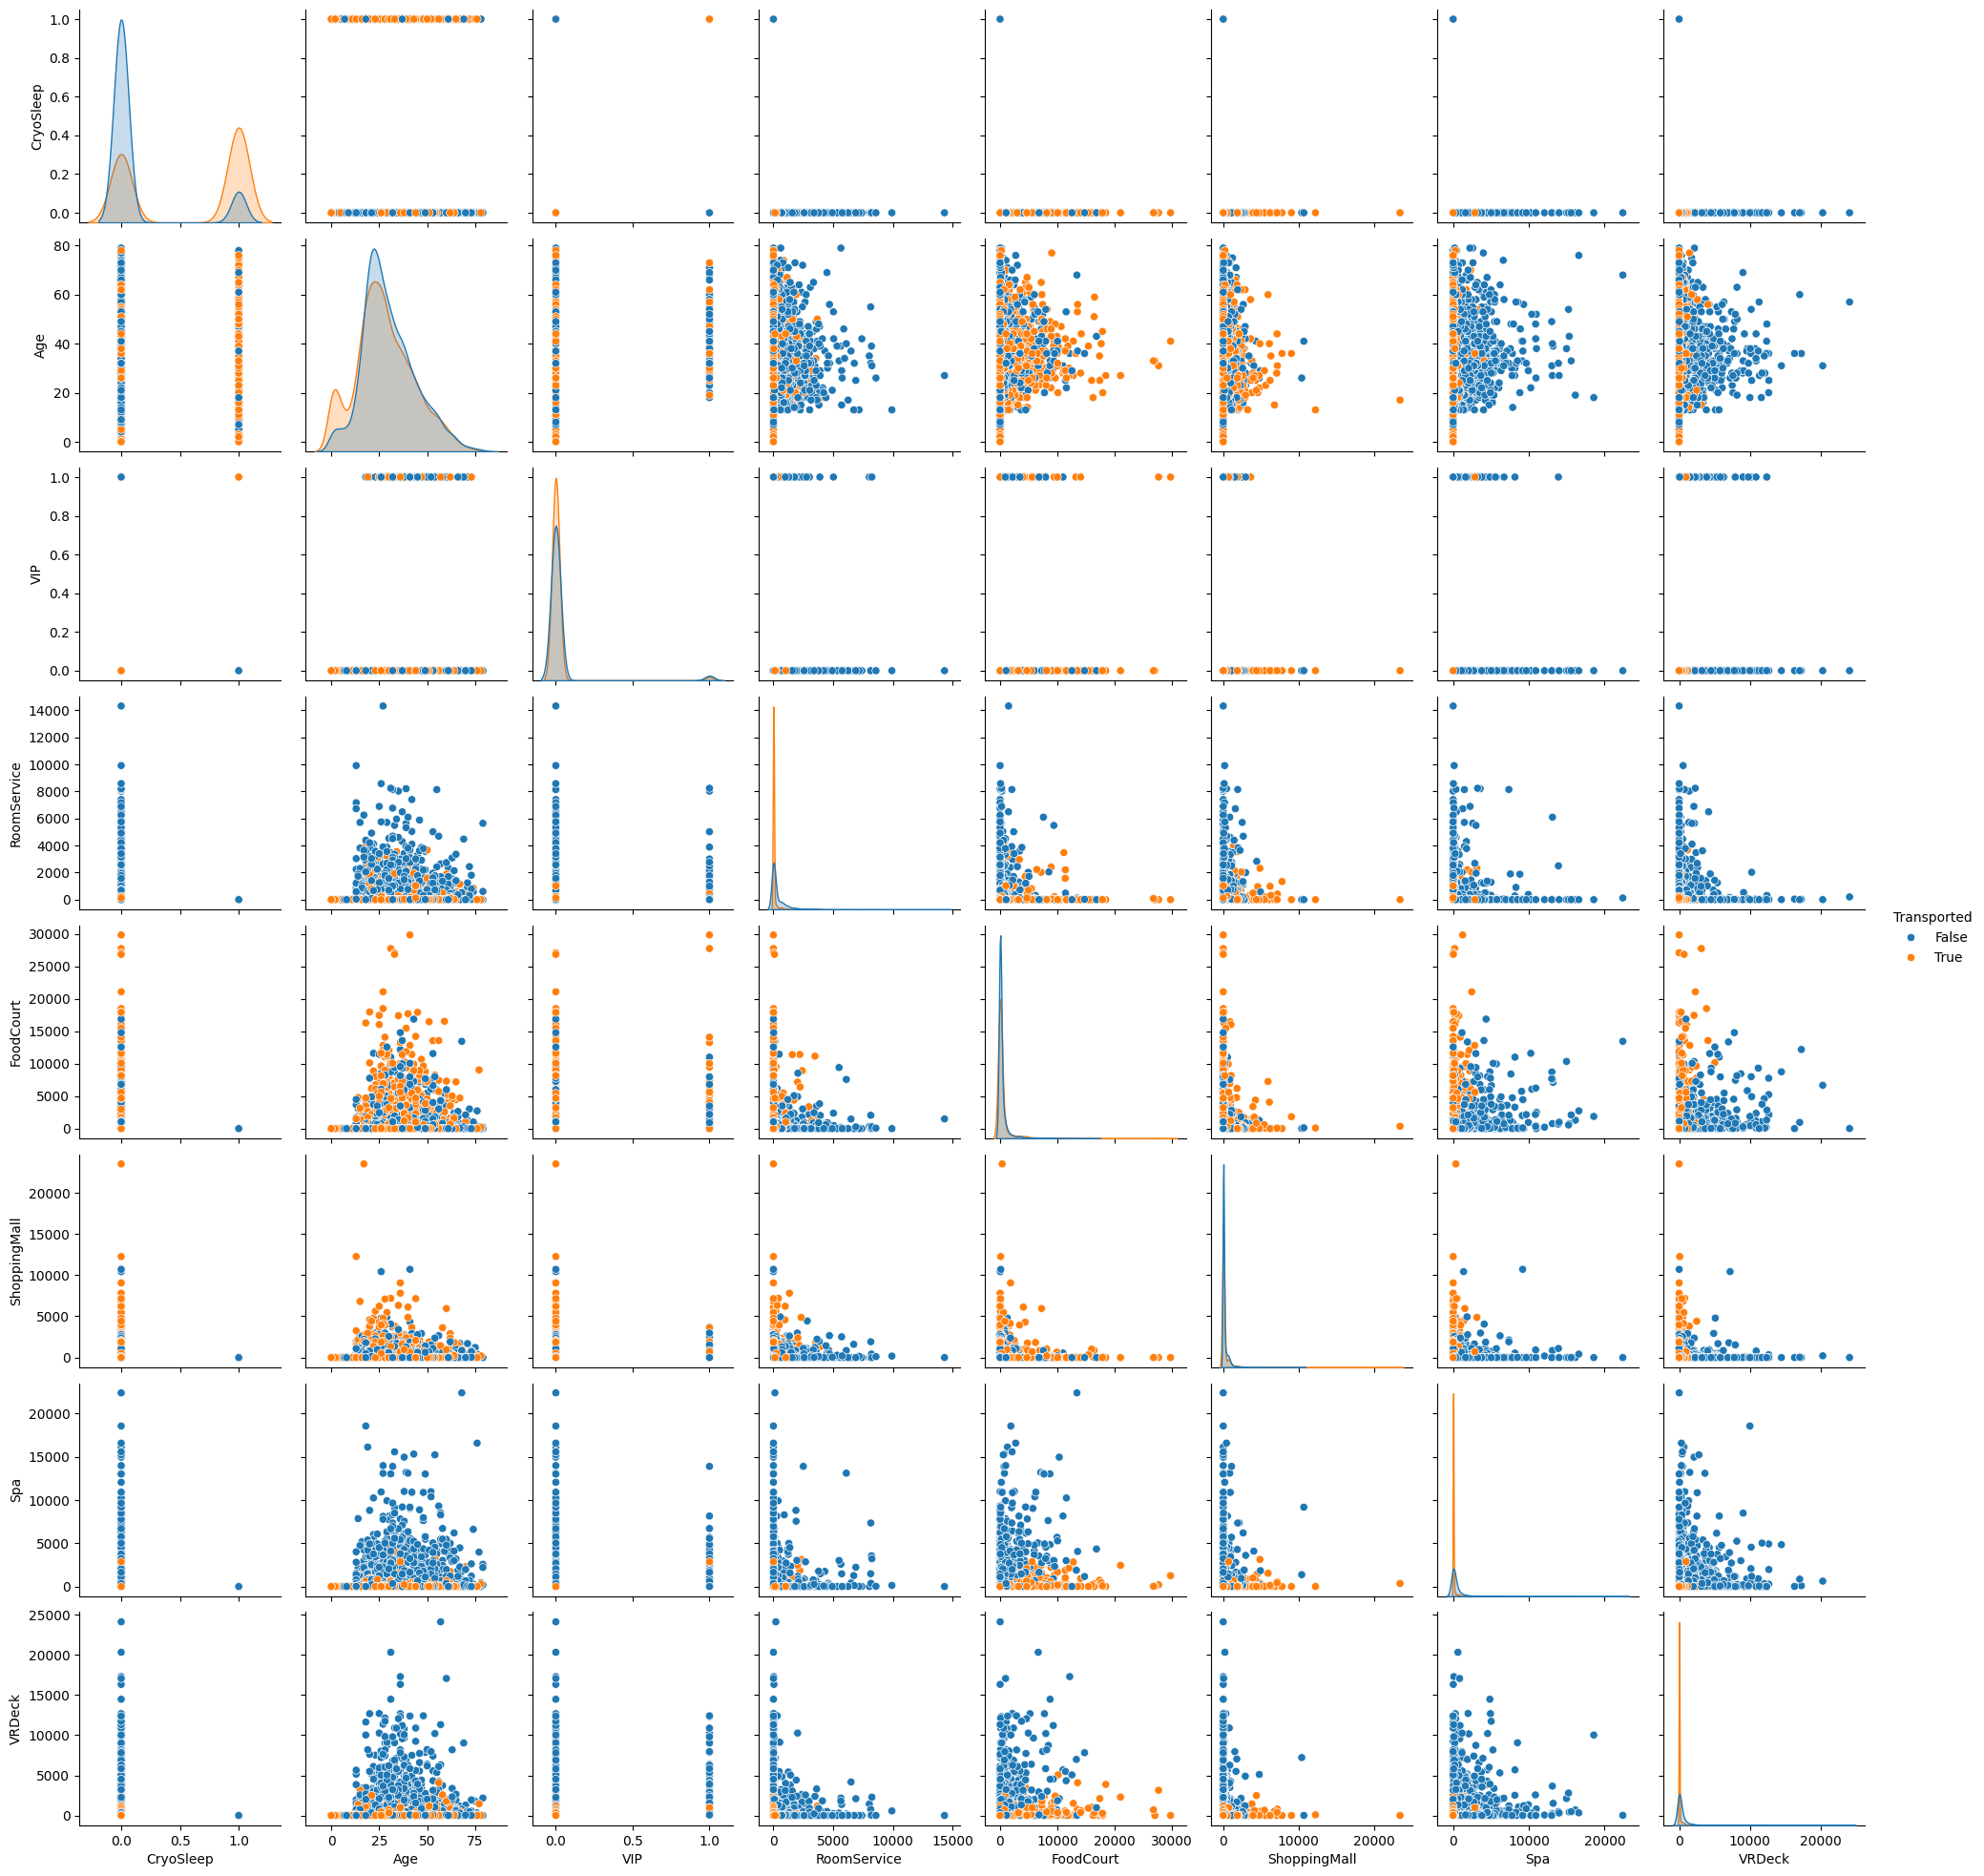

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

sns.pairplot(train_df, hue='Transported', diag_kind='kde')
plt.show()

### Target Variable Distribution

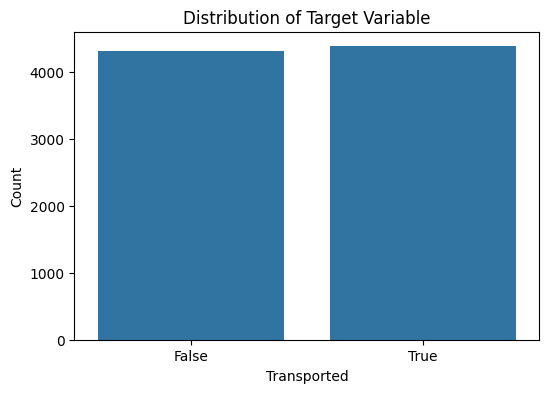

In [12]:
# Example: Bar plot of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Transported')
plt.title("Distribution of Target Variable")
plt.xlabel("Transported")
plt.ylabel("Count")
plt.show()

## Data Preprocessing

### Handling Missing Values by Imputing

In [13]:
# Fill missing values for numeric columns in train_data
numerical_cols = train_df.select_dtypes(include=['float64']).columns
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].mean())

# Fill missing values for numeric columns in test_data
test_numerical_cols = test_df.select_dtypes(include=['float64']).columns
test_df[test_numerical_cols] = test_df[test_numerical_cols].fillna(test_df[test_numerical_cols].mean())


### Encoding Categorical Features

In [14]:
# Extract the 'Transported' column before one-hot encoding in the training data
transported_column = train_df['Transported']

# Extract 'PassengerId' from test data
passenger_ids = test_df['PassengerId']

# Drop the 'Transported' column from the training data
train_df = train_df.drop(columns=['Transported'])

# One-hot encode categorical columns in train_data
categorical_cols = train_df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_df_encoded = encoder.fit_transform(train_df[categorical_cols])

# Get feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_cols)

# Convert the encoded data to a DataFrame with proper column names
train_data_encoded_df = pd.DataFrame(train_df_encoded, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
train_df = pd.concat([train_df.drop(columns=categorical_cols), train_data_encoded_df], axis=1)

In [15]:
# One-hot encode categorical columns in test_data
test_categorical_cols = test_df.select_dtypes(include=['object']).columns
test_df_encoded = encoder.transform(test_df[test_categorical_cols])

# Get feature names after one-hot encoding for test_data
test_feature_names = encoder.get_feature_names_out(input_features=test_categorical_cols)

# Convert the encoded test data to a DataFrame with proper column names
test_data_encoded_df = pd.DataFrame(test_df_encoded, columns=test_feature_names)

# Concatenate the encoded test DataFrame with the original test DataFrame
test_df = pd.concat([test_df.drop(columns=test_categorical_cols), test_data_encoded_df], axis=1)

In [16]:
# Add the 'Transported' column back to the training data
train_df['Transported'] = transported_column

### Correlation Matrix

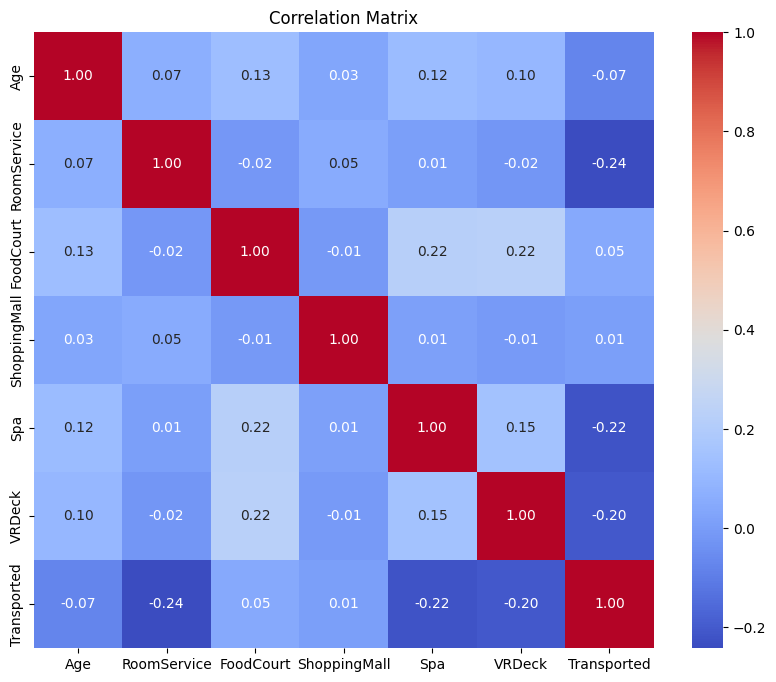

In [17]:
corr_df = train_df.drop(columns=[i for i in train_df.columns if i.__contains__('_')])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

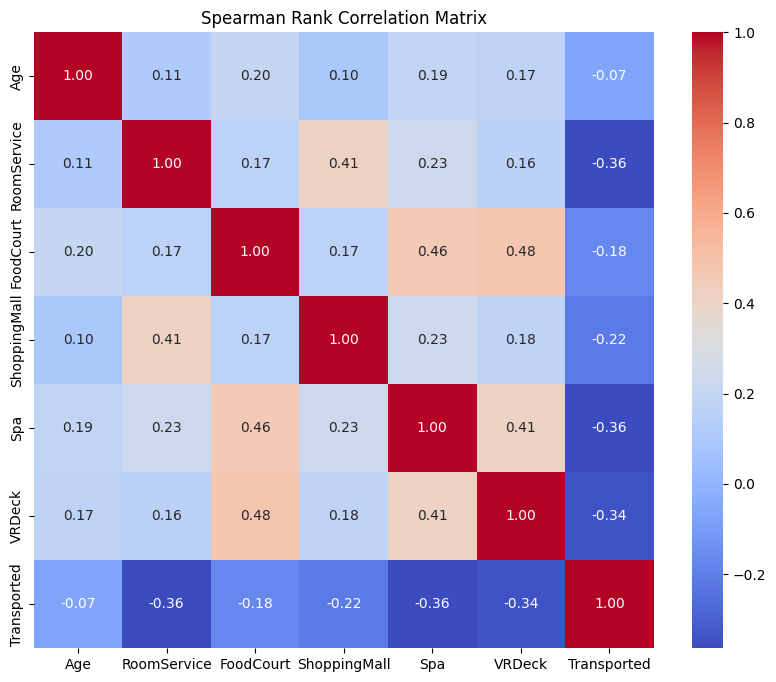

In [18]:
spearman_corr_matrix = corr_df.corr(method='spearman')

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Rank Correlation Matrix")
plt.show()


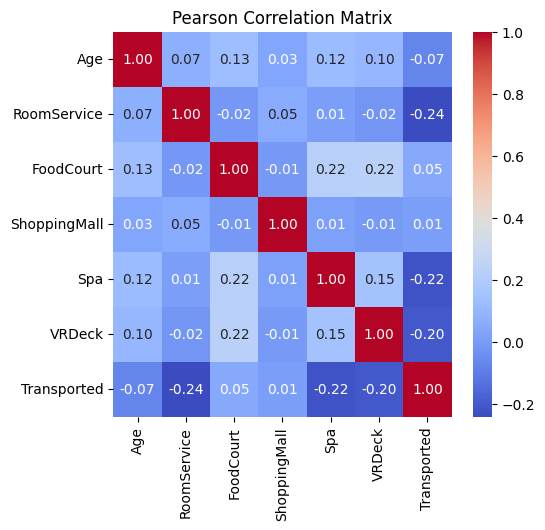

In [19]:
pearson_corr_matrix = corr_df.corr(method='pearson')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

### Distribution of Numerical Features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


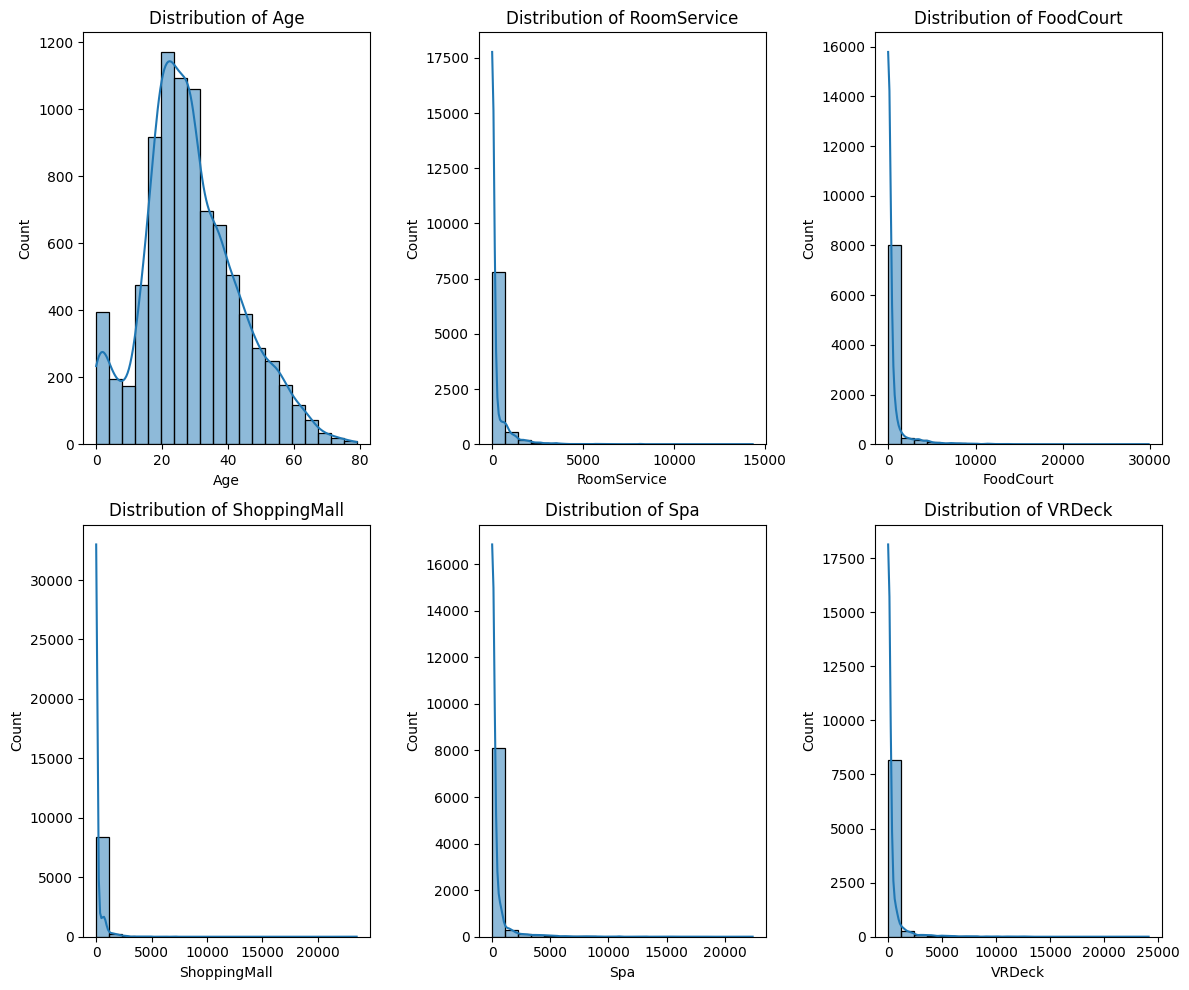

In [20]:
# histograms
numerical_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
print(numerical_features)
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Class Distribution

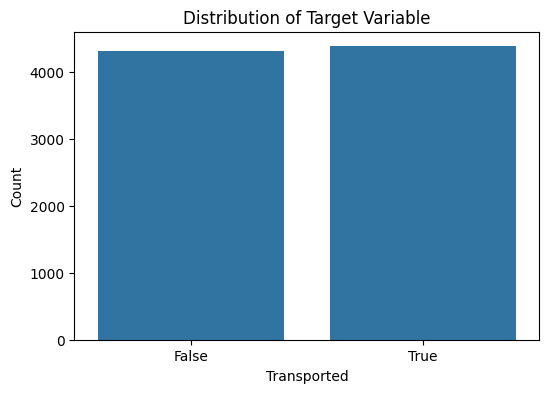

In [21]:
# Bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Transported')
plt.title("Distribution of Target Variable")
plt.xlabel("Transported")
plt.ylabel("Count")
plt.show()

## Building the Models

### Splitting the data into features and target variables

In [22]:
# X_train = train_df.drop(columns=['PassengerId', 'Transported'])
# y_train = train_df['Transported']

# X_test = test_df.drop(columns=['PassengerId'])


# Define X (features) and y (target)
X = train_df.drop(['Transported'], axis=1)
y = train_df['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [23]:
# scaler = StandardScaler()

# # Scale the numerical features in both training and test datasets
# train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
# test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### OneHot Encoding

In [24]:
# # Define the columns to be one-hot encoded
# categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

# # Create a OneHotEncoder instance
# encoder = OneHotEncoder(handle_unknown='ignore')

# # Fit the encoder on the training data
# encoder.fit(X_train[categorical_cols])

# # Transform both training and testing data using the same encoder
# X_train_encoded = encoder.transform(X_train[categorical_cols])
# X_test_encoded = encoder.transform(X_test[categorical_cols])

# # Create new DataFrames with the one-hot encoded columns
# X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
# X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# # Concatenate the one-hot encoded columns with the numerical columns
# X_train_final = pd.concat([X_train_encoded_df, X_train[numerical_cols]], axis=1)
# X_test_final = pd.concat([X_test_encoded_df, X_test[numerical_cols]], axis=1)

# y_test = test_df['Transported']

## Training Models

### Logistic Regression

In [25]:
# logistic_regression = LogisticRegression(random_state=42)
# logistic_regression.fit(X_train_final, y_train)

# # Predict on the training data
# y_pred_lr_train = logistic_regression.predict(X_train_final)

# # Evaluate the Logistic Regression model on the training data
# accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
# classification_rep_lr_train = classification_report(y_train, y_pred_lr_train)
# confusion_mat_lr_train = confusion_matrix(y_train, y_pred_lr_train)

# print("Logistic Regression Model (Training Data):")
# print(f"Accuracy: {accuracy_lr_train:.2f}")
# print("\nClassification Report:\n", classification_rep_lr_train)
# print("\nConfusion Matrix:\n", confusion_mat_lr_train)


logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Classification Report:\n", classification_rep_lr)
print("Confusion Matrix:\n", confusion_mat_lr)

Accuracy: 0.7590569292696953
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.75      0.75       861
        True       0.76      0.77      0.76       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739

Confusion Matrix:
 [[643 218]
 [201 677]]


### Random Forest

In [26]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_rep_rf)
print("Confusion Matrix:\n", confusion_mat_rf)

Accuracy: 0.78205865439908
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.79      0.78       861
        True       0.79      0.77      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Confusion Matrix:
 [[683 178]
 [201 677]]


### Decision Trees

In [27]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_rep_dt)
print("Confusion Matrix:\n", confusion_mat_dt)

Accuracy: 0.7694077055779184
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.76      0.76       861
        True       0.77      0.78      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix:
 [[652 209]
 [192 686]]


### Gradient Boosting

In [28]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)

print("Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_rep_gb)
print("Confusion Matrix:\n", confusion_mat_gb)

Accuracy: 0.7860839562967222
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.73      0.77       861
        True       0.76      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix:
 [[630 231]
 [141 737]]


### Light Gradient Boosting Machine

In [29]:
lightgbm = lgb.LGBMClassifier(random_state=42)
lightgbm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lgbm = lightgbm.predict(X_test)

# Evaluate the Light GBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)
confusion_mat_lgbm = confusion_matrix(y_test, y_pred_lgbm)

print("Accuracy:", accuracy_lgbm)
print("Classification Report:\n", classification_rep_lgbm)
print("Confusion Matrix:\n", confusion_mat_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Accuracy: 0.7814836112708453
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.7

### XGBoost (Extreme Gradient Boosting)

In [30]:
xgboost = xgb.XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgboost = xgboost.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
classification_rep_xgboost = classification_report(y_test, y_pred_xgboost)
confusion_mat_xgboost = confusion_matrix(y_test, y_pred_xgboost)

print("Accuracy:", accuracy_xgboost)
print("Classification Report:\n", classification_rep_xgboost)
print("Confusion Matrix:\n", confusion_mat_xgboost)

Accuracy: 0.7780333525014376
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Confusion Matrix:
 [[645 216]
 [170 708]]


## Visualizing the Results

### Model Comparison

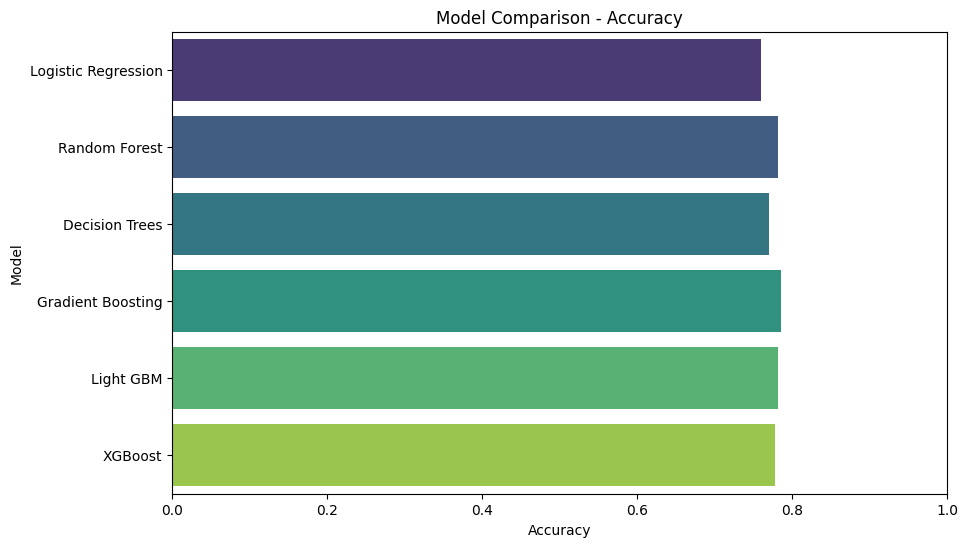

In [31]:
model_names = ["Logistic Regression", "Random Forest", "Decision Trees", "Gradient Boosting", "Light GBM", "XGBoost"]
accuracies = [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_gb, accuracy_lgbm, accuracy_xgboost]

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Comparison - Accuracy")
plt.xlim(0, 1)  # Set the x-axis limit between 0 and 1 for accuracy values
plt.show()

### Confusion Matrix Visualization

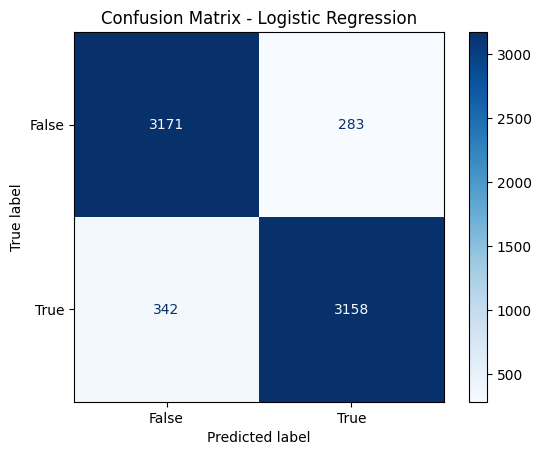

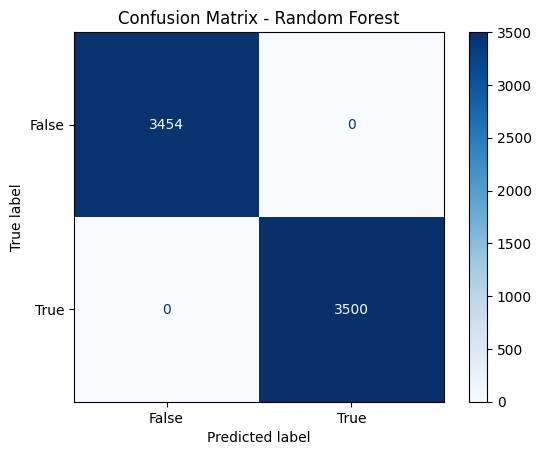

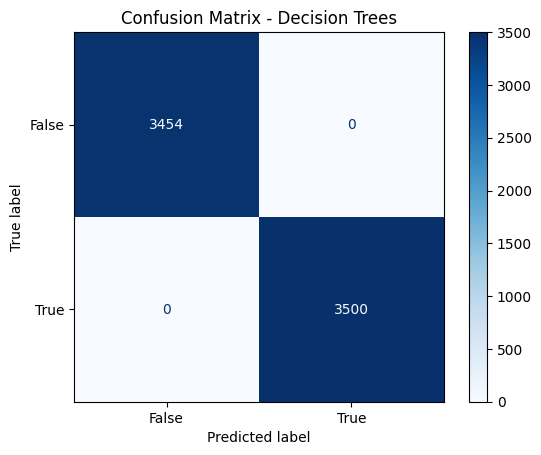

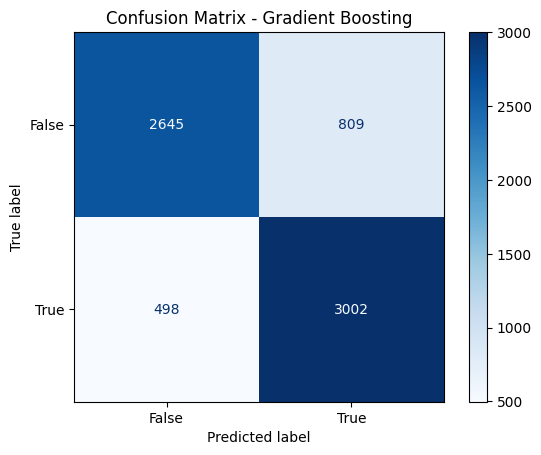

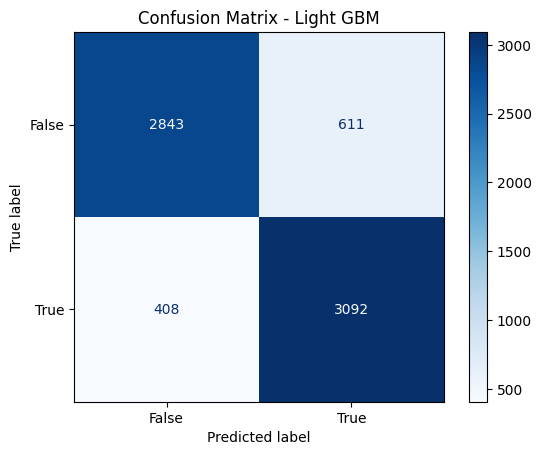

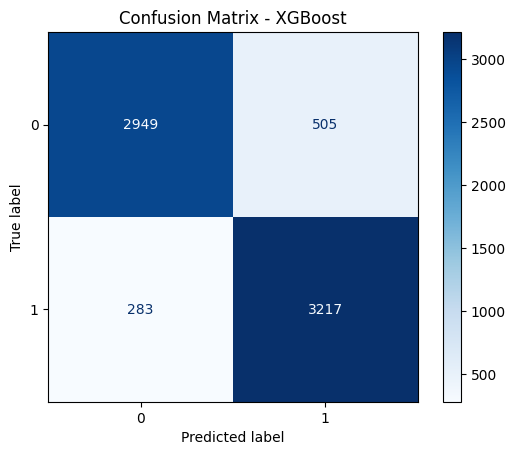

In [32]:
def plot_model_confusion_matrix(model, X, y, model_name):
    predictions = model.predict(X)
    cm = confusion_matrix(y, predictions, labels=model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Generate confusion matrix plots for all models
models = [logistic_regression, random_forest, decision_tree, gradient_boosting, lightgbm, xgboost]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Trees', 'Gradient Boosting', 'Light GBM', 'XGBoost']

for model, model_name in zip(models, model_names):
    plot_model_confusion_matrix(model, X_train, y_train, model_name)

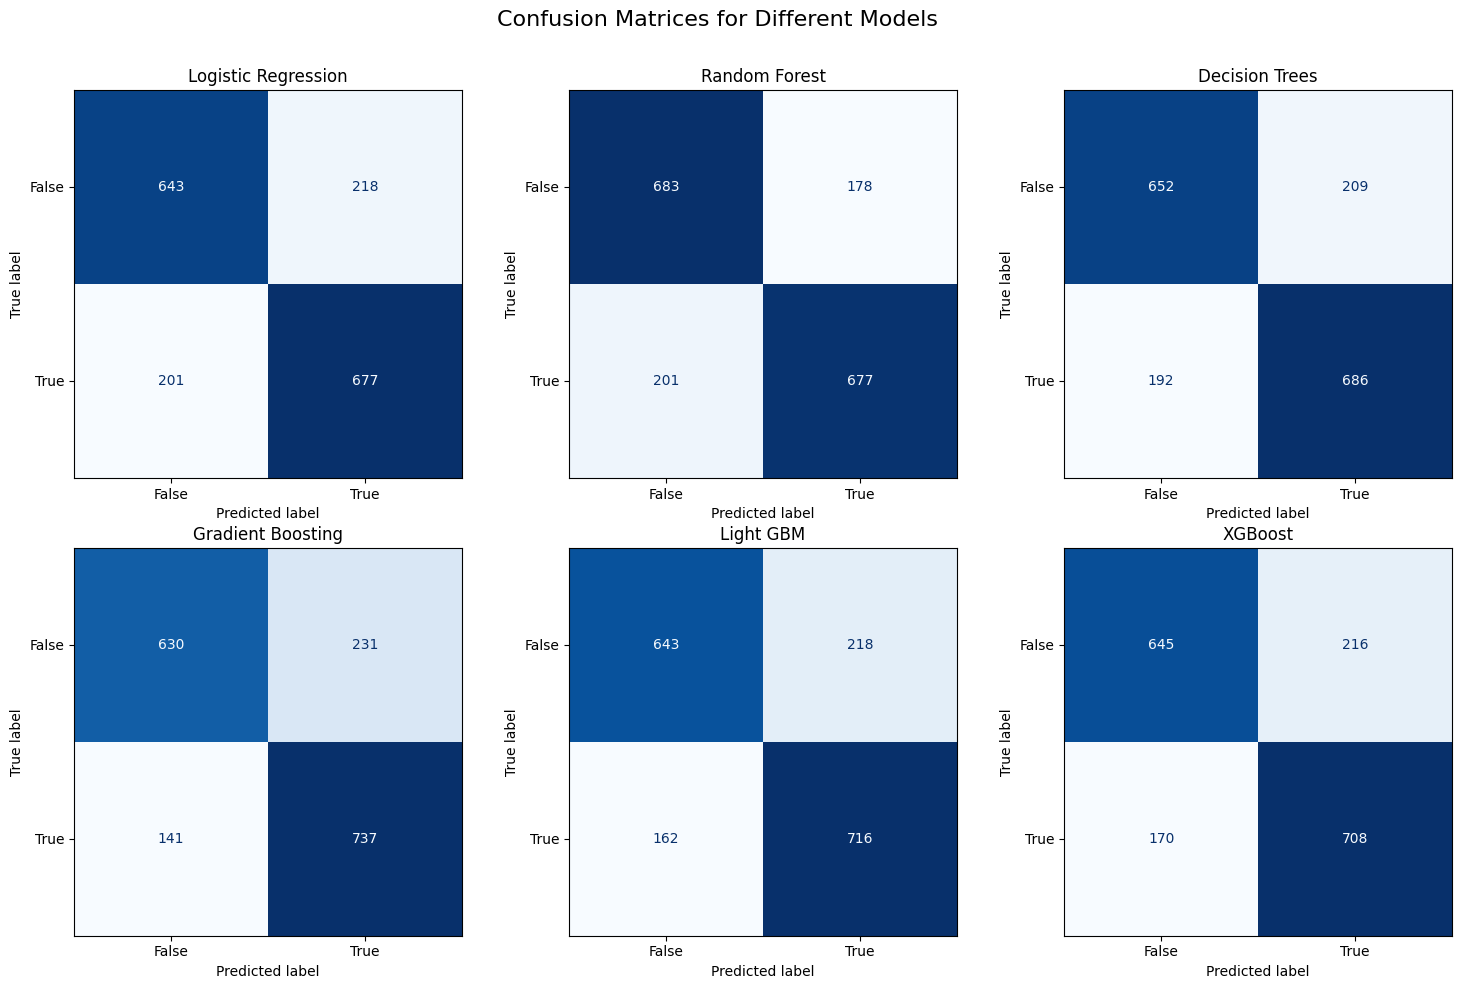

In [33]:
models = ["Logistic Regression", "Random Forest", "Decision Trees", "Gradient Boosting", "Light GBM", "XGBoost"]
predictions = [y_pred_lr, y_pred_rf, y_pred_dt, y_pred_gb, y_pred_lgbm, y_pred_xgboost]

# Create subplots for each model's confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Confusion Matrices for Different Models", fontsize=16)

for i, ax in enumerate(axes.ravel()):
    cm = confusion_matrix(y_test, predictions[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    disp.ax_.set_title(models[i])
    disp.im_.colorbar.remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### ROC Curves

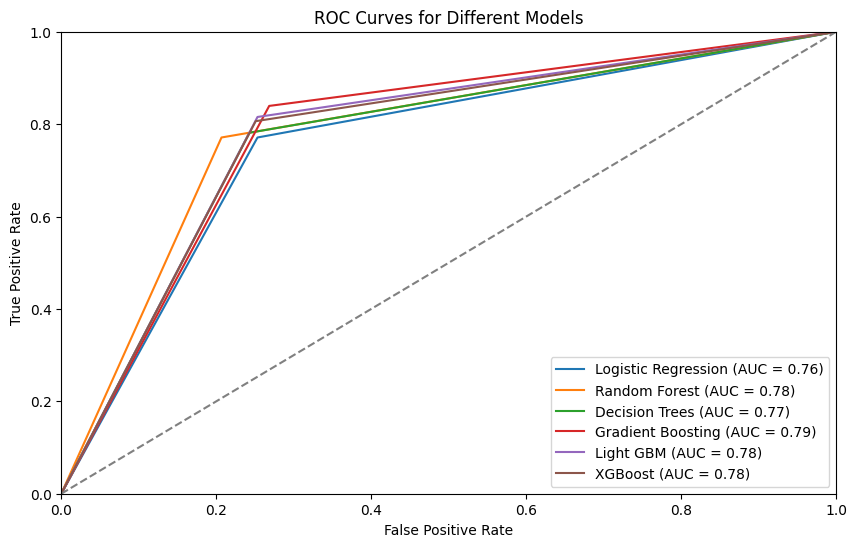

In [34]:
plt.figure(figsize=(10, 6))
plt.title("ROC Curves for Different Models")

# Plot ROC curve for each model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test, predictions[i])
    auc = roc_auc_score(y_test, predictions[i])
    plt.plot(fpr, tpr, label=f"{models[i]} (AUC = {auc:.2f})")

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Feature Importance Plot

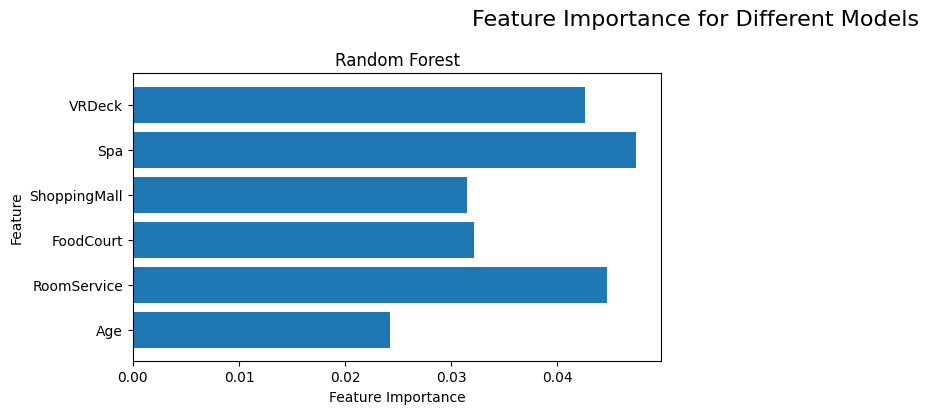

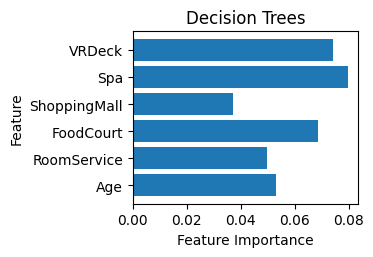

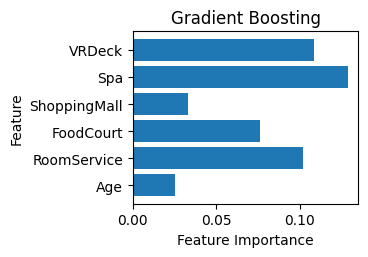

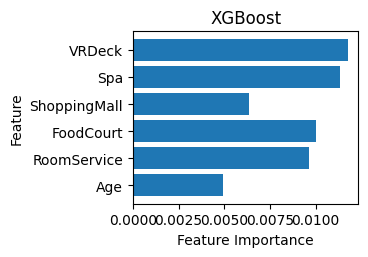

In [35]:
models = ["Random Forest", "Decision Trees", "Gradient Boosting", "XGBoost"]
importances = [random_forest.feature_importances_, decision_tree.feature_importances_, gradient_boosting.feature_importances_, xgboost.feature_importances_]

# train_df = train_df.drop(columns=['Transported'])
# test_df = test_df.drop(columns=['PassengerId'])

# Create subplots for feature importance plots
plt.figure(figsize=(15, 8))
plt.suptitle("Feature Importance for Different Models", fontsize=16)

for i in range(len(models)):
    plt.subplot(2, 2, i+1)
    plt.barh(range(len(train_df.columns[:6])), importances[i][:6], tick_label=train_df.columns[:6])
    plt.title(models[i])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

    plt.subplots_adjust(top=0.9)
    plt.show()

### Learning Curve

#### Plotting Function

In [36]:
# def plot_learning_curve(estimator, X, y):
#     train_sizes, train_scores, valid_scores = learning_curve(
#         estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
#     )

#     # Calculate mean and standard deviation of training and validation scores
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     valid_mean = np.mean(valid_scores, axis=1)
#     valid_std = np.std(valid_scores, axis=1)

#     # Create learning curves plot
#     plt.figure(figsize=(8, 6))
#     plt.title("Learning Curves")
#     plt.xlabel("Training Examples")
#     plt.ylabel("Score")
#     plt.grid()

#     # Plot training and validation curves
#     plt.fill_between(
#         train_sizes,
#         train_mean - train_std,
#         train_mean + train_std,
#         alpha=0.1,
#         color="blue",
#     )
#     plt.fill_between(
#         train_sizes,
#         valid_mean - valid_std,
#         valid_mean + valid_std,
#         alpha=0.1,
#         color="red",
#     )
#     plt.plot(train_sizes, train_mean, marker="o", color="blue", label="Training Score")
#     plt.plot(train_sizes, valid_mean, marker="o", color="red", label="Validation Score")

#     # Add legend
#     plt.legend(loc="best")
#     plt.tight_layout()
#     plt.show()

from joblib import Parallel, delayed

def compute_learning_curve(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
    )
    return train_sizes, train_scores, valid_scores

def plot_learning_curve_parallel(models, X_train, y_train):
    results = Parallel(n_jobs=-1)(
        delayed(compute_learning_curve)(model, X_train, y_train) for model in models
    )

    for i, model in enumerate(models):
        train_sizes, train_scores, valid_scores = results[i]
        
        # Calculate mean and standard deviation of training and validation scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        # Create learning curves plot
        plt.figure(figsize=(8, 6))
        plt.title("Learning Curves")
        plt.xlabel("Training Examples")
        plt.ylabel("Score")
        plt.grid()

        # Plot training and validation curves
        plt.fill_between(
            train_sizes,
            train_mean - train_std,
            train_mean + train_std,
            alpha=0.1,
            color="blue",
        )
        plt.fill_between(
            train_sizes,
            valid_mean - valid_std,
            valid_mean + valid_std,
            alpha=0.1,
            color="red",
        )
        plt.plot(train_sizes, train_mean, marker="o", color="blue", label="Training Score")
        plt.plot(train_sizes, valid_mean, marker="o", color="red", label="Validation Score")

        # Add legend
        plt.legend(loc="best")
        plt.tight_layout()
        plt.show()


#### Iterate through each model and plot learning curves

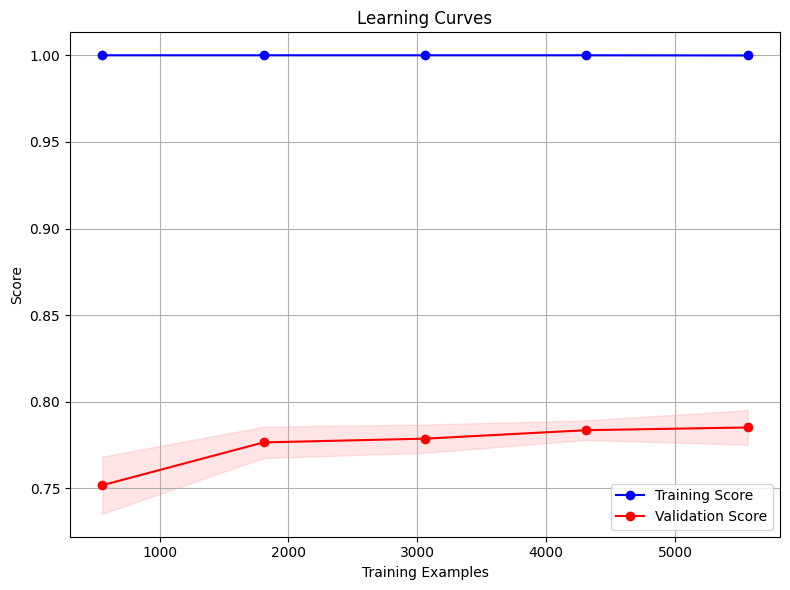

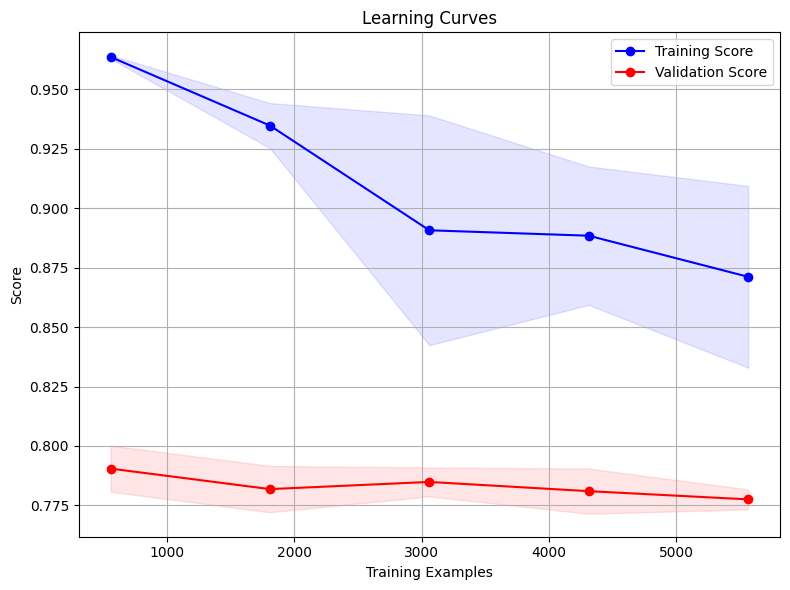

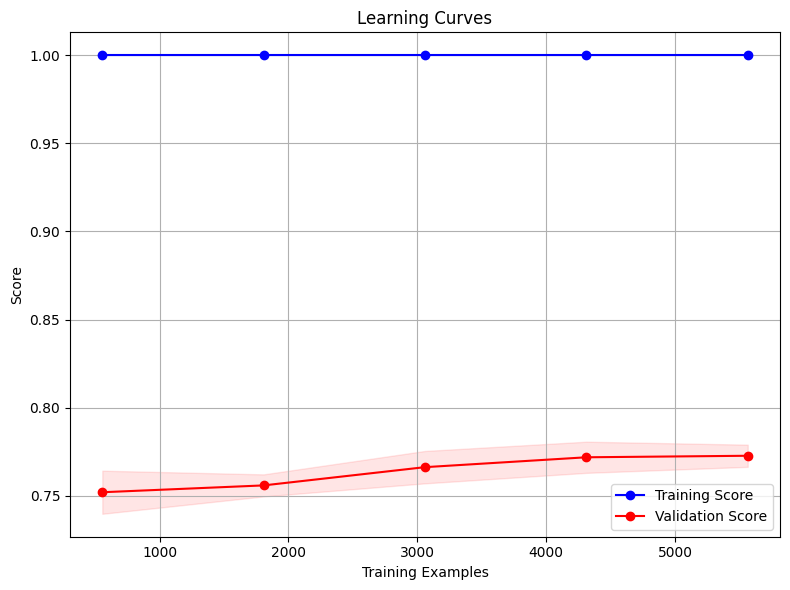

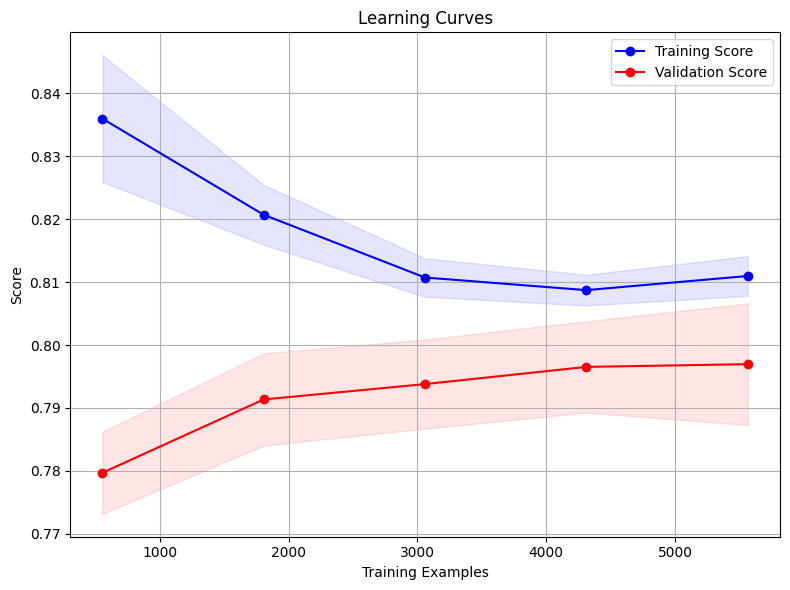

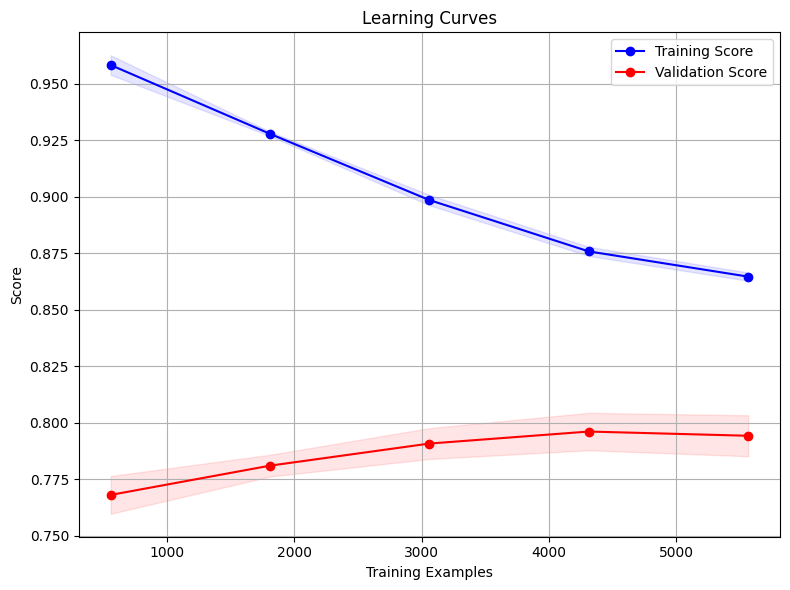

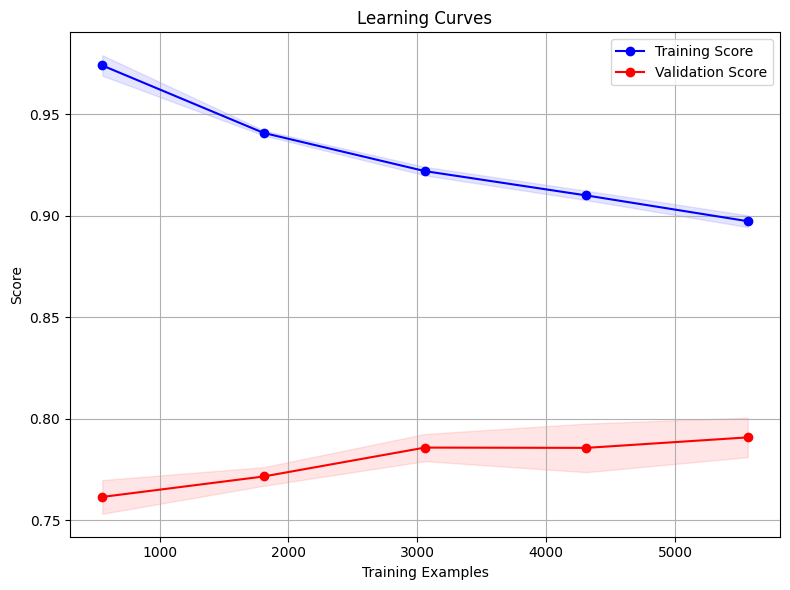

In [37]:
models = [random_forest, logistic_regression, decision_tree, gradient_boosting, lightgbm, xgboost]

plot_learning_curve_parallel(models, X_train, y_train)

## Submission

In [38]:
model_names = ["random_forest", "logistic_regression", "decision_trees", "gradient_boosting", "lightbgm", "xgboost"]

def create_submission_csv(m, mn):
    predictions = m.predict(test_df)
    submission_data = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': predictions})
    submission_data.to_csv(f'submission_{mn}.csv', index=False)

In [39]:
for i, j in zip(models, model_names):
    create_submission_csv(i, j)